In [40]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

df=pd.read_csv("C:/Users/varsh/Downloads/archive/Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)


In [10]:
df.head()


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
geodummies = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'])


In [12]:
geodummies.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
genderdummies = geodummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})


C:\Users\varsh\AppData\Local\Temp\ipykernel_2496\1976762983.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genderdummies = geodummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})


In [14]:
genderdummies.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [15]:
df_encoded = genderdummies


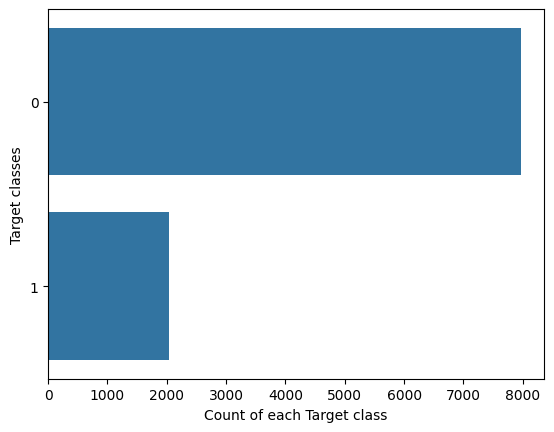

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df_encoded.Exited ,data=df_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

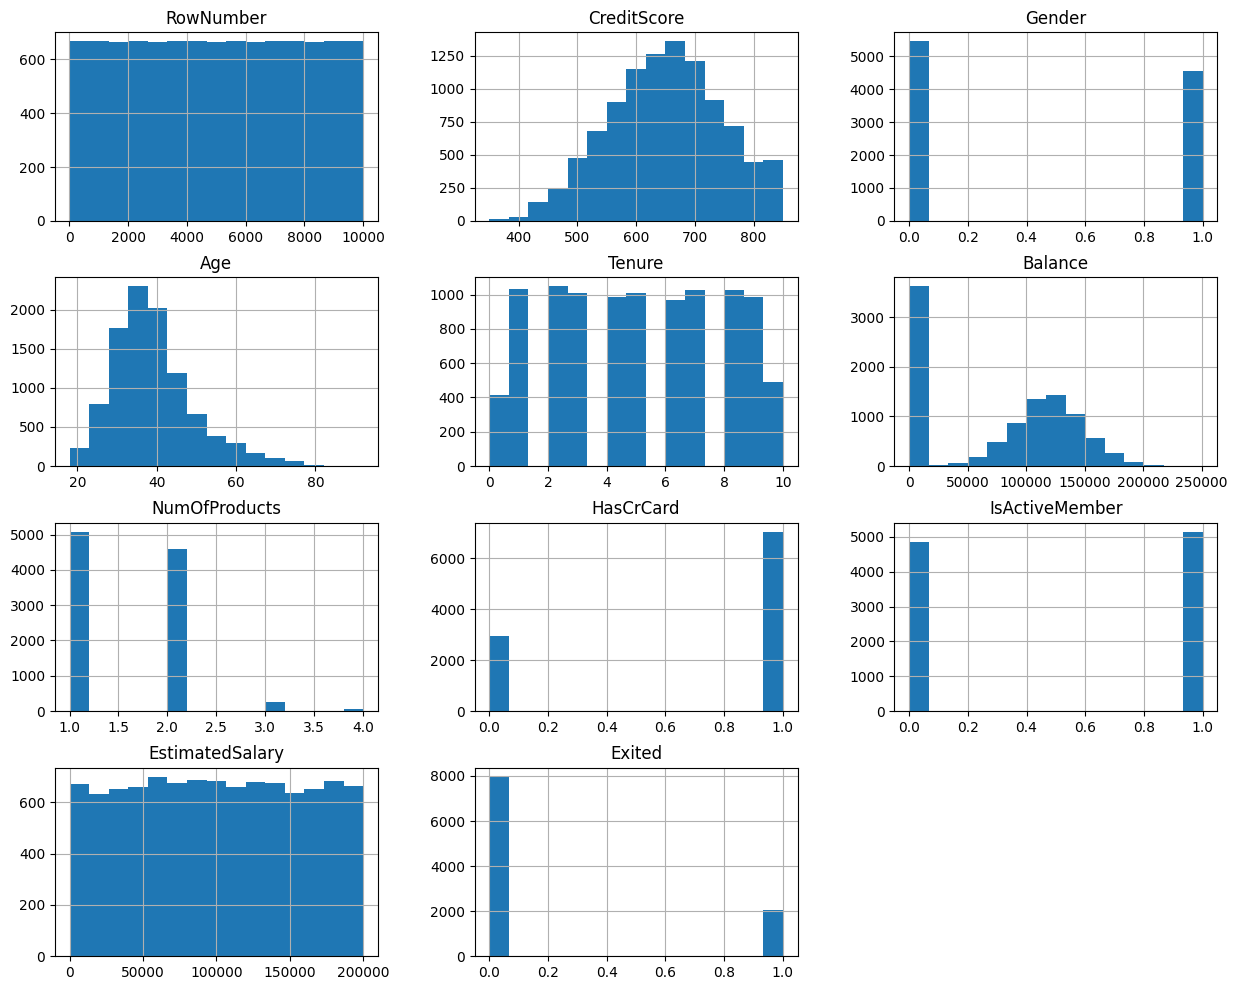

In [17]:
df_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

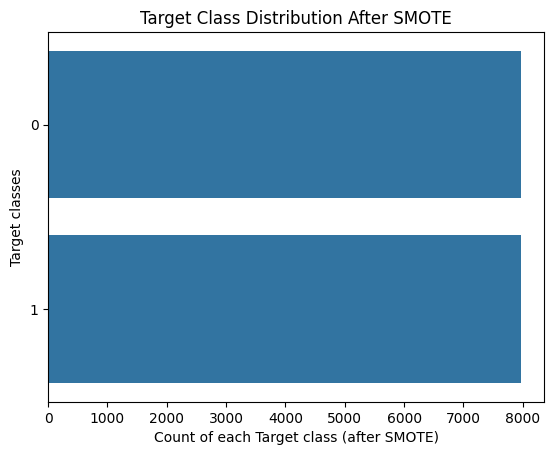

In [21]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Exited'] = y_res

sns.countplot(y=df_resampled['Exited'], data=df_resampled)
plt.xlabel("Count of each Target class (after SMOTE)")
plt.ylabel("Target classes")
plt.title("Target Class Distribution After SMOTE")
plt.show()

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

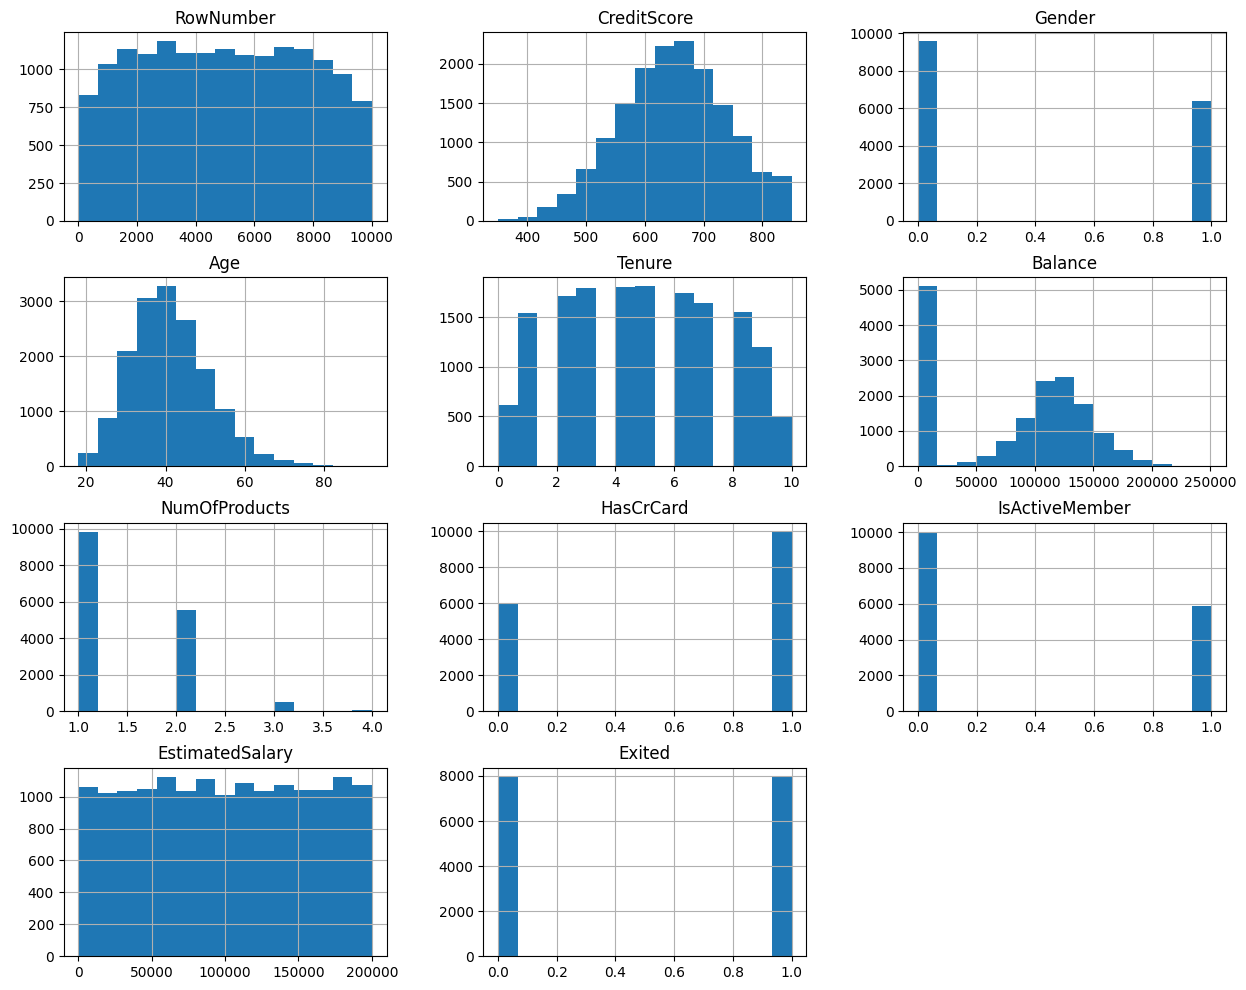

In [23]:
df_resampled.hist(figsize=(15,12),bins = 15)

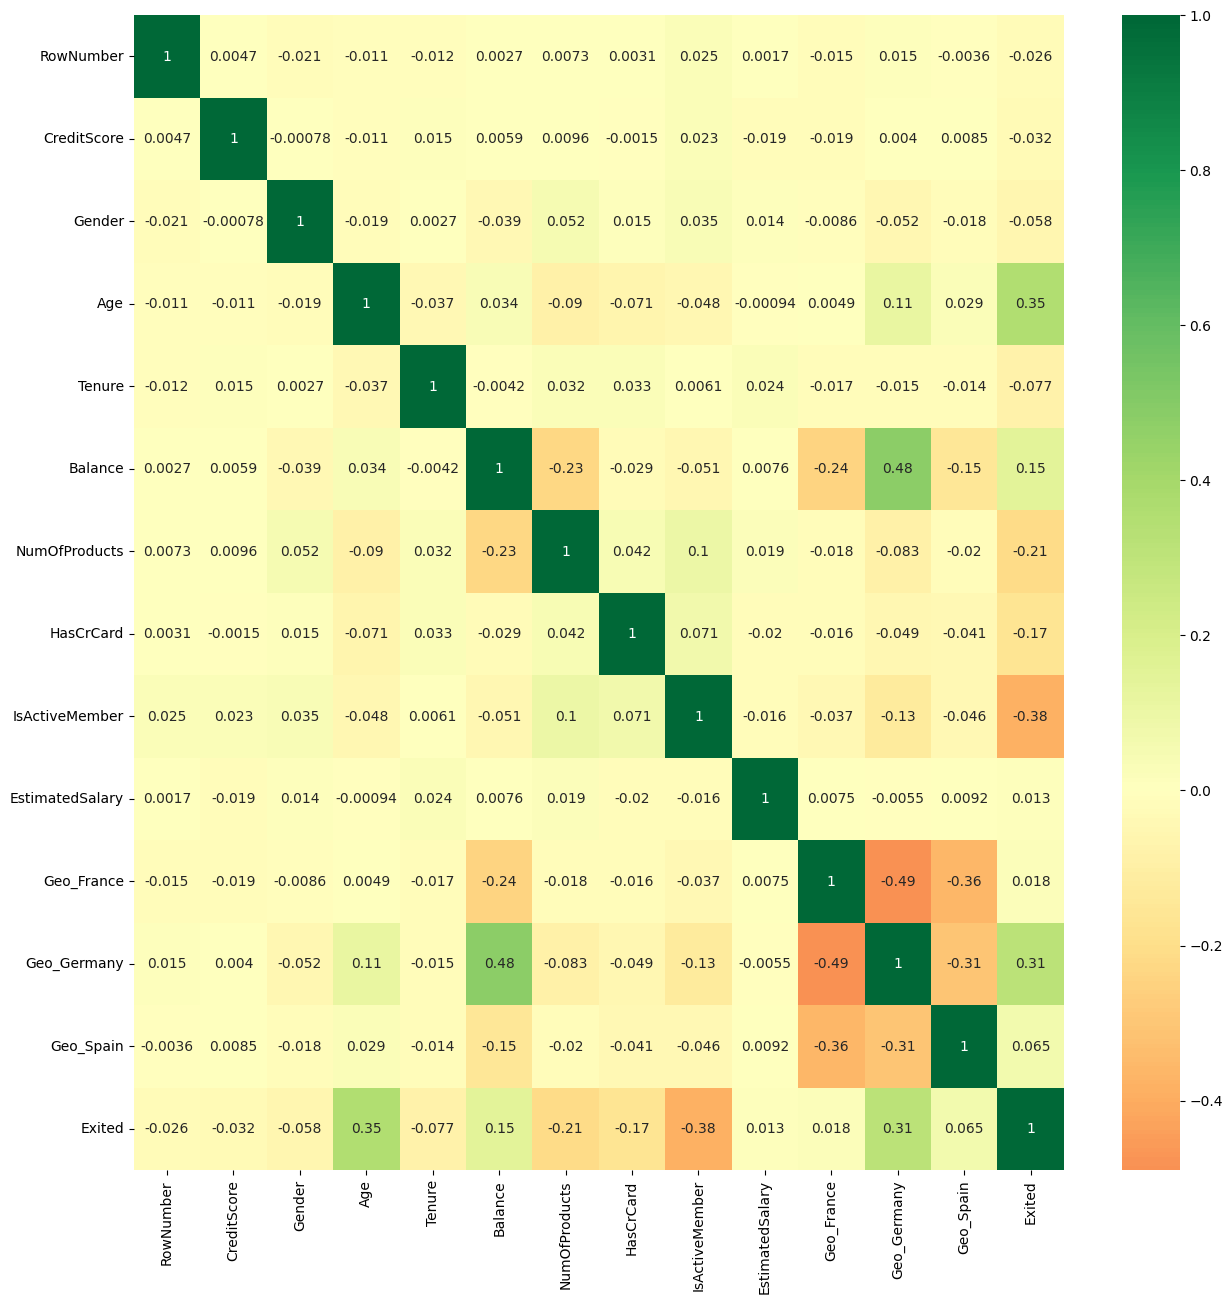

In [24]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df_resampled.corr(), annot=True,cmap='RdYlGn',center=0) 


In [27]:
df_resampled.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
0,1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False,1
1,2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True,0
2,3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False,1
3,4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True,0


In [ ]:
numeric_cols = df_resampled.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
print(outliers.sum()) 


RowNumber            0
CreditScore         30
Gender               0
Age                244
Tenure               0
Balance              0
NumOfProducts       65
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [29]:
df_resampled.shape

(15926, 14)

In [ ]:
numeric_cols = df_resampled.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

mask = ~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)

df_new = df_resampled[mask]

print("Original shape:", df_resampled.shape)
print("Shape after removing outliers:", df_new.shape)


Original shape: (15926, 14)
Shape after removing outliers: (15589, 14)


In [66]:
X = df_new.drop(['Exited'],axis=1)
y = df_new.Exited

In [ ]:
X.head()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
X.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

classifier = Sequential()


input_dim = X_train.shape[1]  

classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=input_dim))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)  

print('*'*20)


score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)


cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


X_train shape: (10912, 13)
X_test shape: (4677, 13)
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8616 - loss: 0.3101
Train score: 0.31513479351997375
Train accuracy: 0.8590542674064636
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
********************
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8469 - loss: 0.3379
Test score: 0.33414819836616516
Test accuracy: 0.8511866331100464
Confusion Matrix:
 [[2027  314]
 [ 382 1954]]


Text(0.5, 23.52222222222222, 'Predicted label')

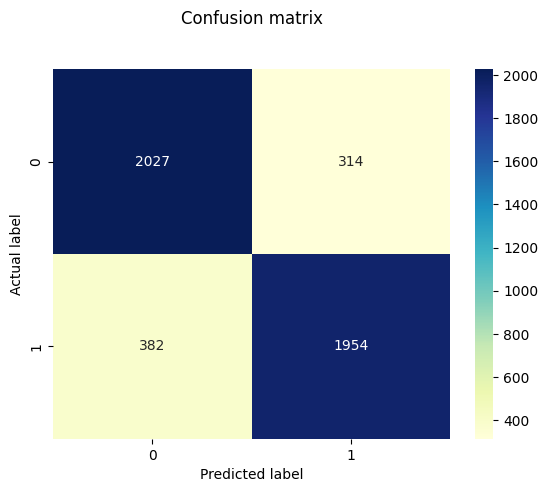

In [49]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2341
           1       0.86      0.84      0.85      2336

    accuracy                           0.85      4677
   macro avg       0.85      0.85      0.85      4677
weighted avg       0.85      0.85      0.85      4677



147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


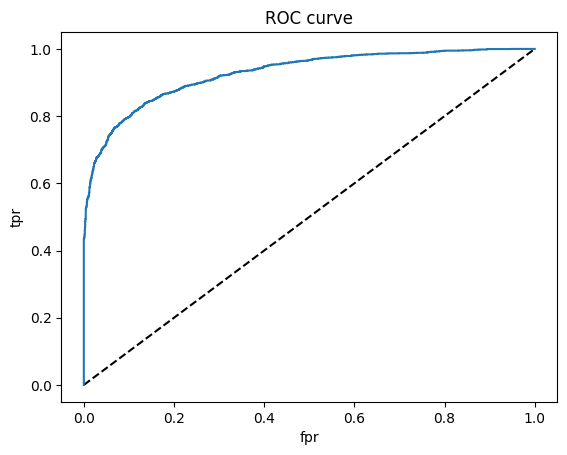

In [52]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

# Split again if not already split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN function
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter options
batch_sizes = [25, 32]
epochs_list = [50, 100]
optimizers = ['adam', 'rmsprop']

best_accuracy = 0
best_params = {}

# Manual grid search
for batch in batch_sizes:
    for epoch in epochs_list:
        for opt in optimizers:
            print(f"Training with batch={batch}, epochs={epoch}, optimizer={opt}")
            
            model = build_classifier(opt)
            history = model.fit(X_train, y_train, 
                                batch_size=batch, 
                                epochs=epoch, 
                                validation_split=0.2,
                                verbose=0)
            
            # Evaluate on validation set
            _, acc = model.evaluate(X_train, y_train, verbose=0)
            
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {'batch_size': batch, 'epochs': epoch, 'optimizer': opt}

print("Best Parameters after tuning:", best_params)
print("Best Accuracy after tuning:", best_accuracy)


Training with batch=25, epochs=50, optimizer=adam


d:\AIWORKFORCE\ANN AND CLASSIFY 16\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with batch=25, epochs=50, optimizer=rmsprop
Training with batch=25, epochs=100, optimizer=adam
Training with batch=25, epochs=100, optimizer=rmsprop
Training with batch=32, epochs=50, optimizer=adam
Training with batch=32, epochs=50, optimizer=rmsprop
Training with batch=32, epochs=100, optimizer=adam
Training with batch=32, epochs=100, optimizer=rmsprop
Best Parameters after tuning: {'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}
Best Accuracy after tuning: 0.860612154006958


In [70]:
import joblib

model.save("churn_model.h5")      # saves ANN
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [74]:
df_encoded.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True
